In [2]:
from keras.models import load_model
import os
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix #classification_report
import itertools  # for confusion matrix plot
from keras.utils import np_utils
%matplotlib inline
class_label = ['background', 'body','nose', 'tail']
#class_label = ['angry', 'happy','neutral']
n_class = len(class_label)


In [5]:
## model load


model_path = '/python/autokeras/ak_model_mice.h5'
model=load_model(model_path)



C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


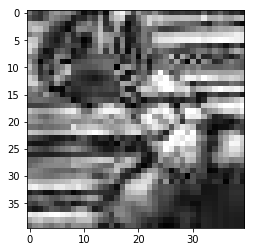

In [74]:
# mice sample plot 
import glob
path2 = '/Data/mice/nose'
lists = glob.glob(path2+'/*.jpg')
import cv2
size = 8
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(size,size))  
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))     
img = cv2.imread(lists[0], cv2.IMREAD_GRAYSCALE)  #load img as grayscale
img = clahe.apply(img) 

import matplotlib.pyplot as plt
%matplotlib inline
#plt.imshow(img, cmap='gray')
thr =150
#test= cv2.add(img, thr)

plt.imshow(img, cmap='gray')

In [101]:
## data load
data_path = '/github/fer/data/test/'
os.chdir(data_path)
x_data = np.load('./x_data_sample.npy')
y_data = np.load('./y_data_sample.npy')

class_dist = [len(y_data[y_data==i]) for i, c in enumerate(class_label)] 
print(class_dist)
 # 2. arrange the data. shape change,
img_size =48
x_data = x_data.reshape(-1, img_size,img_size,1)
y_data = np_utils.to_categorical(y_data, n_class)
   
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, shuffle = True, random_state=33)

[65, 65, 65]


In [27]:
list_re.sort(key=lambda f: ''.join(filter(str.isdigit, f))))

    
a='asdf3c3'
b=list(filter(str.isdigit, a))
blist
threshed = cv2.adaptiveThreshold(im, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

ValueError: invalid literal for int() with base 10: ''

In [59]:
model_path = '/github/fer/model/models/basenet.h5'
model = load_model(model_path)
model.compile(loss = categorical_crossentropy,
              optimizer = Adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-7),
              metrics = ['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [110]:
# 조교님 테스트

#os.chdir('/github/fer/data/')
model_path = '/github/fer/model/models/ak31_32.h5'
#model_path = '/python/autokeras/ak31_32.h5'
model=load_model(model_path)

# transfer learning

for layer in model.layers[0:-10]:
    layer.trainable = False

255

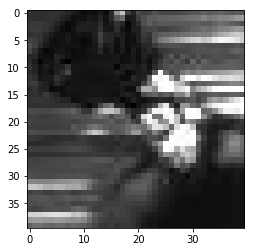

In [54]:
import os
import cv2
import glob
path = '/Data/mice/nose'
os.chdir(path)
os.getcwd()
list_jpg = glob.glob('./*.jpg')

lt.imshow(img, cmap='gray')
#cv2.add

20
start9 end29


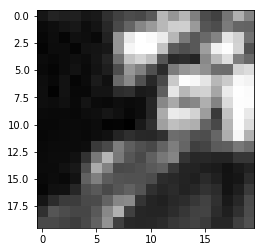

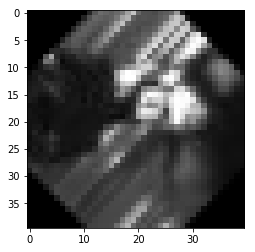

In [8]:
cv2.imshow('rot',rot)
plt.imshow(rot, cmap='gray')


In [ ]:
## test before learning
data_path = '/github/fer/data/ta/'
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        data_path,
        target_size=(target_size, target_size),
        batch_size=32, shuffle=False, color_mode = 'grayscale',
        class_mode='categorical')

normalized
[[0.         0.24137931 0.75862069]
 [0.         0.27777778 0.72222222]
 [       nan        nan        nan]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


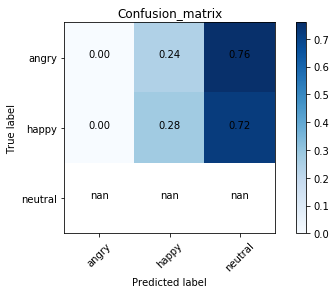

In [269]:
class_label = ['angry', 'happy','neutral']
pred = model.predict_generator(test_generator)
#from sklearn.metrics import confusion_matrix
y_true = test_generator.classes
y_pred = np.argmax(pred,axis=1)

confusion_result = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_result, classes = class_label, normalize = True, title = 'Confusion_matrix')

In [207]:
model.save('ak_weak_whole.h5')
os.getcwd()

'F:\\data\\webcam_weak'

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))      

#target_size = 30

def preprocess_img(img_path, target_size):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  #load img as grayscale
    img = crop_center(img, target_size)
    img = clahe.apply(img)  # histogram equalization
    img = np.array(img)/255.  # normalize
    return img

def plot_samples_from_path(data_path='/github/fer/data', class_idx=0, n = 10, target_size=20):
    
    split_label = ['test','train','validation']
    list_folder = os.listdir(data_path)
    
    npy_list = glob.glob(data_path+'/*.npy')
    chk_npy = False
    if npy_list: # if there is a npy in the folder, load npy
        print('\n Npy loading..\n')
        chk_npy =True
        x = np.load(npy_list[0])
        y = np.load(npy_list[1])
        if len(list(set(y))) > 3:
            class_label = ['angry', 'disgust', 'fear','happy','sad','surprise','neutral']
            
        ### caution. n_class must be considered
        files = x[y==class_idx]
        np.random.shuffle(files)
    else:     # if there's no npy, load png images from folder
        print('load PNG images from the directory\n')
        
        if list_folder == split_label:  # that means, train, val, test split folder 
            data_path = os.path.join(data_path, split_label[2]) # read from test folder
            print('load from test folder\n')
        
        class_label = os.listdir(data_path)
        n_class_label = len(class_label)
            
        print('Direct loading...\n')

        path_class = os.path.join(data_path, class_label[class_idx]) ####### 0: neutral 1: happy 2: angry
        files = glob.glob(path_class+'/*.*')
        #np.random.shuffle(files)
    print('\n Class: {}\n'.format(class_label[class_idx]))
    
    files = files[0:n]
    n_fig = len(files)
    print(n_fig)
    
    n_row = int(np.sqrt(n_fig))
    n_col = int(n_fig/n_row)+1
    fig, axes = plt.subplots(n_row ,n_col, figsize=(10, 15))
    axes = axes.flatten()
    
    n_diff = n_row*n_col-n_fig
        
    for i, file in enumerate(files):
        if chk_npy==False:
            file = preprocess_img(file, target_size)
        
        axes[i].imshow(file, cmap = 'gray')
        axes[i].axis('off')
    for j in range(n_diff):
        axes[n_fig+j].axis('off')
    
    #axes[0].set_title("Class:{}".format(layer_idx_), fontsize=10)    
    fig.show()
    fig.savefig('total_'+class_label[class_idx]+'.png',bbox_inches='tight',dpi=300) 
    
    return 

def rot_img(img, angle=45):
    rows, cols = img.shape[:2]
    rot = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    rot = cv2.warpAffine(img, rot,(cols,rows))
    return rot

def crop_center(img, target_size=20):
    center_len = int(img.shape[0]/2)

    start = int(center_len-target_size/2-1)
    end = int(center_len+target_size/2-1)
#    print(center_len)    
 #   print('start{} end{}'.format(start,end))
    new_img = img[start:end, start:end]
    return new_img
    
#plt.imshow(new_img, cmap='gray')

In [ ]:
os.path.split()

load PNG images from the directory

Direct loading...


 Class: nose

20


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


load PNG images from the directory

Direct loading...


 Class: nose

20


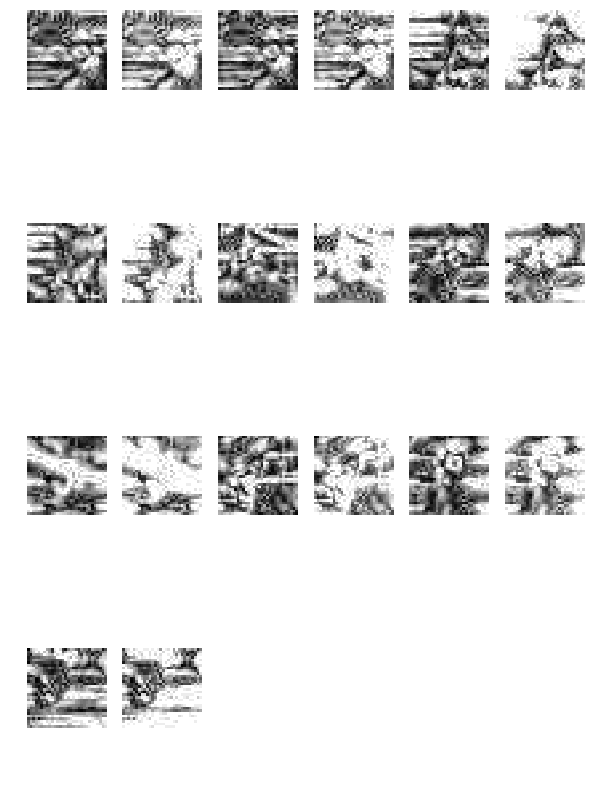

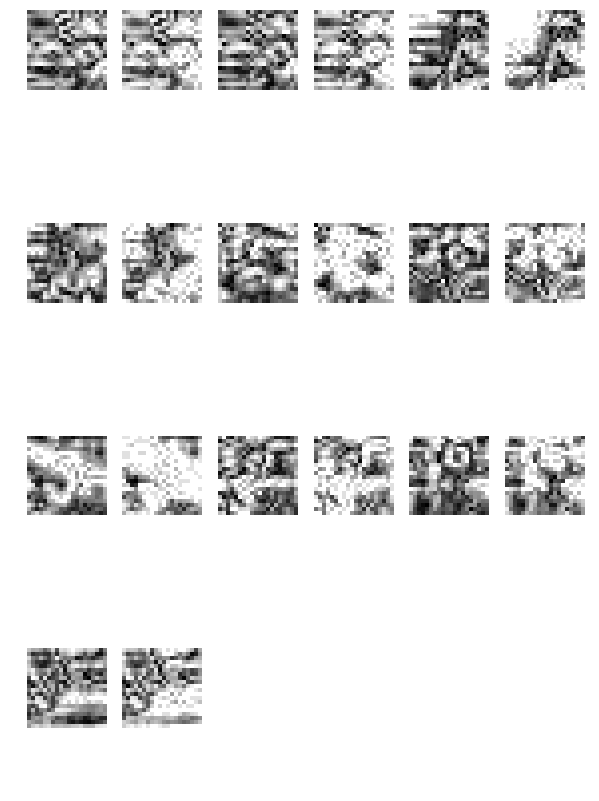

In [38]:
plot_samples_from_path(data_path='/Data/mice', class_idx=2, n = 20, target_size=30)
plot_samples_from_path(data_path='/Data/mice', class_idx=2, n = 20, target_size=20)

load PNG images from the directory

Direct loading...


 Class: nose

20


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


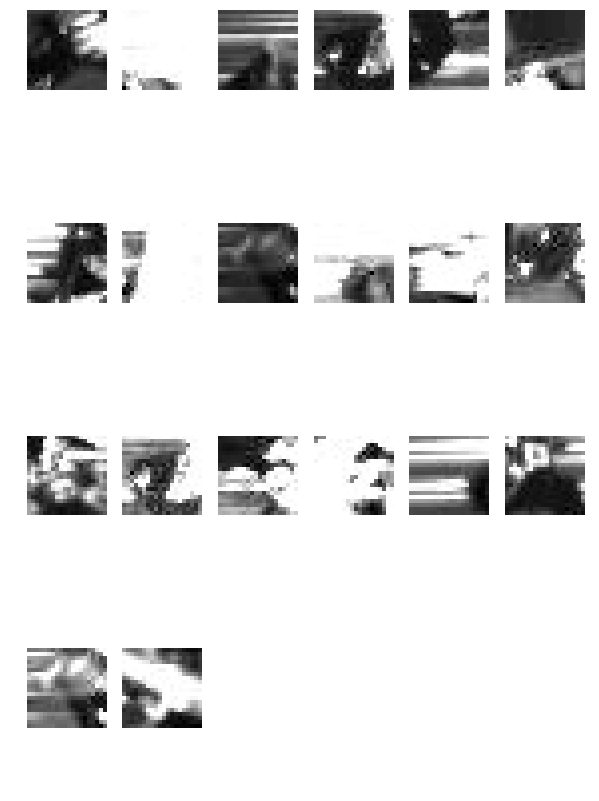

load PNG images from the directory

Direct loading...


 Class: nose

20


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


load PNG images from the directory

Direct loading...


 Class: nose

20


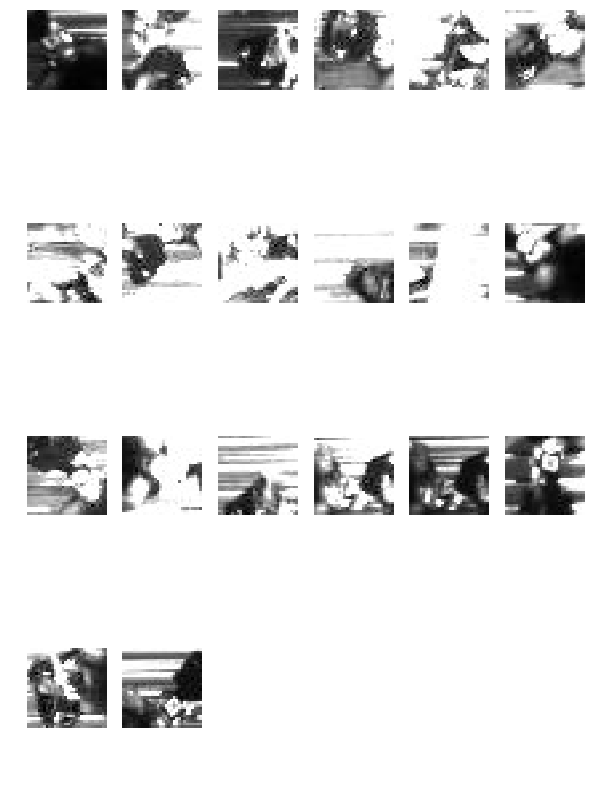

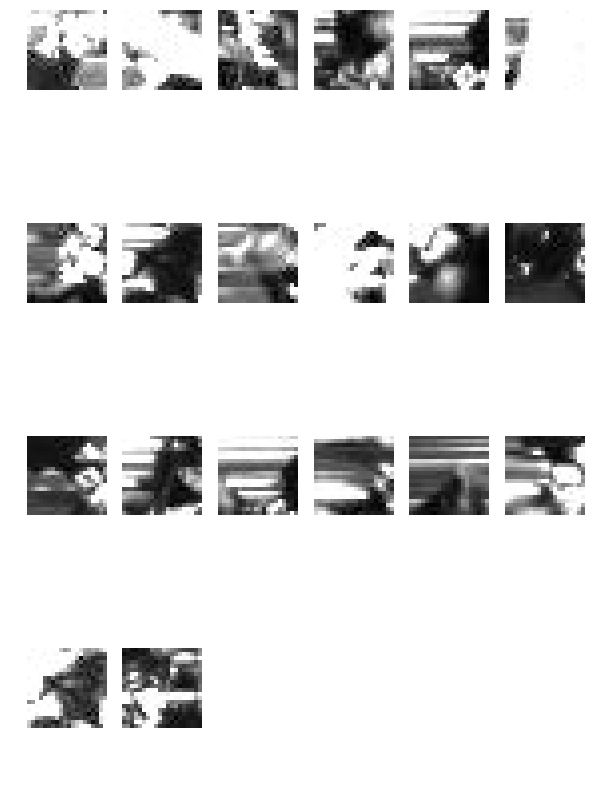

In [34]:
plot_samples_from_path(data_path='/Data/mice', class_idx=2, n = 20, target_size=30)
plot_samples_from_path(data_path='/Data/mice', class_idx=2, n = 20, target_size=20)

In [126]:
#TA initial
model.evaluate_generator(test_generator)

[0.4327739848030938, 0.8888888955116272]

In [128]:
#result.shape
model.save('transfer.h5')

In [212]:
100+ 1e-5

100.00001

load data
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)
(1, 28, 28)


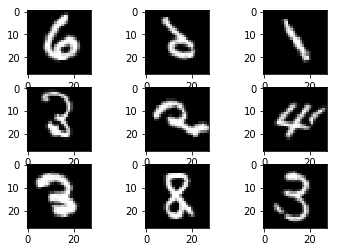

In [37]:
# Random Rotations
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
%matplotlib inline
from keras import backend as K
K.set_image_dim_ordering('th')

# load data
print('load data')
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float -> whiy?
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation
datagen = ImageDataGenerator(rotation_range=30,vertical_flip=True)
# fit parameters from data
datagen.fit(X_train)
batch_size = 9
dum = []
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
    # create a grid of 3x3 images
    for i in range(0, batch_size):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
        print(X_batch[i].shape)
        dum.append(X_batch[i])
    # show the plot
    pyplot.show()
    break

In [38]:
import numpy as np
dum=np.array(dum)
dum.shape

(9, 1, 28, 28)

In [12]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


(60000, 1, 28, 28)